# <center> S1: Supplemental calculations for 'Quantifying hydrothermal ammonium recycling and implications for the marine biosphere: A case study from the Guaymas Basin, Gulf of California' </center> 
#### <center> Nathan Rochelle-Bates, Annabel Long, Graeme MacGilchrist, Andreas Teske, Eva E. Stüeken</center> 

##  Section 1: estimating hydrothermal ammonium flux from temperature and porewater data
<hr style="border: solid 3px red">

Analytical solution for vertical steady flow of groundwater (Bredehoeft & Papadopulos, 1965):

$$
\begin{aligned}
(Tz – T0) / (T_L – T0) = f(β, z/L) \\
\end{aligned}
$$
where
$$
\begin{aligned}
f(β, z/L) = (e(β, z/L) - 1) / (e(β) - 1) 
\end{aligned}
$$
and
$$
\begin{aligned}
β = \frac{c_0ρ_0v_zL}{K}
\end{aligned}
$$

(β is a dimensionless parameter)

following Neumann et al. (2023), we can also substitute:
$$
\begin{aligned}
\frac{1}{k} = \frac{c_0 ρ_0}{K}
\end{aligned}
$$


$Tz$ = Temperature measurement at any depth z \
$T0$ = Uppermost temperature measurement\
$T_L$  = Lowermost temperature measurement\
$L$ = distance between T0 and TL \
$c_0 ρ_0$ = heat capacity \
$K$ = thermal conductivity\
$k$ = thermal diffusivity\
$v_z$ = fluid velocity in z-direction

In [15]:
#calculate velocity at 20 cm depth (half the study interval) in all four cores using Bredehoeft & Papadopulos (1965) approach:
#(not including oily core because of unknown fluid properties)

import numpy as np

k = 5e-7 # m2/s  # Fuchs et al., 2015 #thermal diffusivity. 
T0 = [4.8, 4.3, 59] #seafloor  temperature measurements (celsius).
Tz= [52, 12.1, 88] #Temperature measurements at 20 cm depth (celsius).
TL=[88, 22.8, 101]  #Lowermost temperature measurements (celsius).
z=0.2 #depth of measurement (m)
L=0.4 #distance between T0 and TL (m) .
phi=0.8 # porosity
basin_area = 14e9 # area of whole basin (m2)
basin_depth = 2000 # depth of basin (m2)
S_trough_area=9e7  # HT active (southern trough) area m2

#additional params
K=0.75 # thermal conductivity W/m/K - from Neumann et al. 2023 fig 3 - measurements in another part of basin, but seds should be fairly similar
rho_0= 1000 # density of fluid (not particularly variable over temperature interval)
c0= 4000 #J/kgC - from MIT lookup table


#values used to find beta from figure 2 in paper:
fcn_beta_z_L=np.zeros(3)
for i in range(3):
    fcn_beta_z_L[i]= (Tz[i] - T0[i]) / (TL[i] - T0[i]) 

z_over_L = z/L 

print(f'values used for estimating velocity:')
print(f'f(β, z/L) = {fcn_beta_z_L}' )
print(f'z/L = {z_over_L}')

betas=[-0.5, 0.75, -1.5]  # visual estimates from Bredehoeft & Papadopulos (1965) fig. 2 - note that these suggest recharge in the cooler core

#Darcy velocity values:
vzs=np.zeros(3)
vzs_alt=np.zeros(3)
us=np.zeros(3)

for i in range(3):
    vzs[i]=(K*betas[i])/(c0*rho_0*L)  # darcy velocity 
    vzs_alt[i]=(betas[i]*k)/L # alternative darcy velocity using 1/k instead of (c0*rho_0)/K (approach used by Neumann et al., 2023)
    us[i]=vzs[i]/phi # flow velocity m/s

fluxes=us*S_trough_area #  ht flux m3/s - assume same flow from entire southern trough
us_yr=us*31536000   # ht velocity m/yr

print(f'')
print(f'values used in section 6.5 of manuscript:')
print(f'velocities= {us} m/s')
print(f'Southern Trough fluxes = {fluxes} m3/s')
print(f'calculated velocities = {us_yr} m/yr')
print(f'Neumann Darcy flow velocity at ringvent site = {-202/1000} m/yr') # convert from published Darcy velocity of -202 mm/yr to m/yr, from off-axis vent in cooler part of basin
print(f'Neumann flow velocity at ringvent site = {-202/1000/phi/31536000} m/s') # assume same porosity to calculate  flow velocity m/s


values used for estimating velocity:
f(β, z/L) = [0.56730769 0.42162162 0.69047619]
z/L = 0.5

values used in section 6.5 of manuscript:
velocities= [-2.92968750e-07  4.39453125e-07 -8.78906250e-07] m/s
Southern Trough fluxes = [-26.3671875   39.55078125 -79.1015625 ] m3/s
calculated velocities = [ -9.2390625   13.85859375 -27.7171875 ] m/yr
Neumann Darcy flow velocity at ringvent site = -0.202 m/yr
Neumann flow velocity at ringvent site = -8.006722475900559e-09 m/s


In [16]:
# calculate HT ammonium fluxes

ammonium_molL = [0.00356, 0.00029, 0.00419] #mol/L - interpolated linearly from two closest porewater NH4+ measurements
amonium_molm3 = np.multiply(ammonium_molL,1000) #mol/m3
ammonium_flux = np.multiply(amonium_molm3,us) #mol/m2 s
print(f'values used in section 6.5 of manuscript:')
print(f'HT ammonium fluxes = {ammonium_flux} mol/m2 s')

values used in section 6.5 of manuscript:
HT ammonium fluxes = [-1.04296875e-06  1.27441406e-07 -3.68261719e-06] mol/m2 s


In [17]:
# nitrogen supplied by sedimentation for comparison:
sed_rate= [0.08, 0.25]#cm/yr
porosity=0.8
TOC = 3.5 # % typical surface sediment TOC for Guaymas de la lanza espino 1999, teske 2020
CN = 8.5 # Ramirez 2020 C/N mass ratio for background sediments
TN=TOC/CN
TN_model = 0.8814539711106709 # modelled wt% N surface sediment (this study)
sed_density = 2.5 # g/cm3 -(dry sediment density approximated as shale)
porosity = 0.8

mass_N_cm= np.multiply(sed_rate,((1-porosity)*sed_density*(TN/100))) #g/cm2 yr mass of N deposited per cm2 year
mol_N_cm= mass_N_cm/14.01 #mol N/ cm2 yr
mol_N_m = mol_N_cm*10000  #mol N/ m2 yr
mol_N_m_s = mol_N_m/31536000 # mol N/ m2 s 

print(f'values used in section 6.5 of manuscript:')
print(f'nitrogen flux from sedimentation = {mol_N_m_s} mol N/ m2 yr')

values used in section 6.5 of manuscript:
nitrogen flux from sedimentation = [3.72790098e-09 1.16496906e-08] mol N/ m2 yr


In [18]:
# flux from seawater into sediment (recharge)
velocity = 4.39453125e-07 #recharge velocity 4572-15 Bredehoeft & Papadopulos (1965) calculation m/s
SW_NH4 = 40e-9 # SW concentration mol/L from S. Trough bottom water (not from buoyant hydrothermal plumes) (Lam, 2004)
SW_NH4_m3 = SW_NH4*1000 # SW concentration mol/m3
SW_flux = SW_NH4_m3*velocity*porosity # recharge  ammonium flux from seawater at 20 cm depth in  4572-15 mol N/ m^2 s

print(f'Recharge ammonium flux from seawater= {SW_flux} mol N/ m^2 s')

Recharge ammonium flux from seawater= 1.4062500000000003e-11 mol N/ m^2 s


##  Section 2: estimating nitrogen loss from sediment data
<hr style="border: solid 3px red">

Text(0.5, 0, 'Depth (cm)')

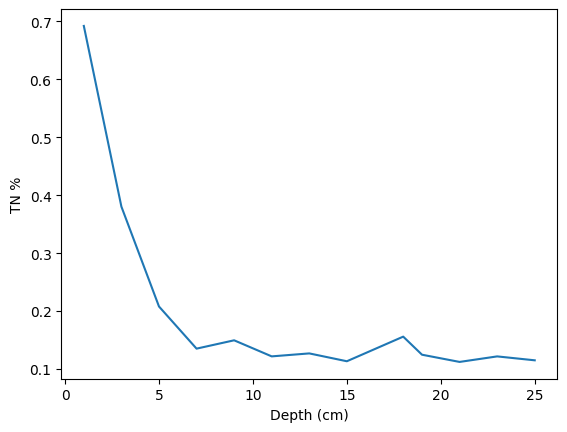

In [19]:
import numpy as np
from matplotlib import pyplot as plt

depths=[1,3,5,7,9,11,13,15,18,19,21,23,25] # measurement depths (cm)
TN = [0.69209297, 0.3802924,  0.20799093, 0.13524755, 0.1496261,  0.12189576, 0.12701818, 0.11348316, 0.15595799, 0.12476856, 0.11232835, 0.12185742,
 0.11510551] # TN% measurements in sediments

plt.plot(depths,TN)
plt.ylabel('TN %')
plt.xlabel('Depth (cm)')

### Method for fitting an exponential function to the data: 
###
$$
\begin{gather}
log TN = \beta + \alpha  z \\
TN = 10^{(\beta +\alpha z)} \\
TN = 10^\beta \cdot 10^{\alpha z} \\
TN = 10^\beta \cdot 10^{\alpha ^{z}}\\
TN\_intercept = 10^\beta \\
loss\_coefficient = 10^\alpha \\
TN = TN\_intercept \cdot loss\_coefficient^z\\
\end{gather}
$$

where:\
$TN$ = Total nitrogen content(%)\
$TN$ intercept = nitrogen content(%) at depth = 0 \
$z$ = sample depth



In [20]:
#fit exp fcn to sediment N curve (first four datapoints)
TN_log=np.log10(TN)
alpha, beta = np.polyfit(depths[0:4],TN_log[0:4],1) #use these values to get the intercept and 'loss coefficient', as shown below

TN_intercept=np.power(10,beta) # projected surface sediment N content
loss_coefficient=np.power(10,alpha) # how much N lost with depth

print(f'projected nitrogen content at seafloor (z=0) = {TN_intercept} %')
print(f'loss coefficient (N lost with depth) = {loss_coefficient}')


projected nitrogen content at seafloor (z=0) = 0.8814539748816371 %
loss coefficient (N lost with depth) = 0.7595232676906296


In [21]:
#write function for exp part
def N_loss_fcn(TN_intercept,z,loss_coefficient):
    return TN_intercept*loss_coefficient**z

In [22]:
#solver for exp loss fcn
def N_loss_exp_solve(TN_intercept,z,loss_coefficient):
    TN_calc = N_loss_fcn(TN_intercept,z,loss_coefficient)
    return TN_calc, z
    

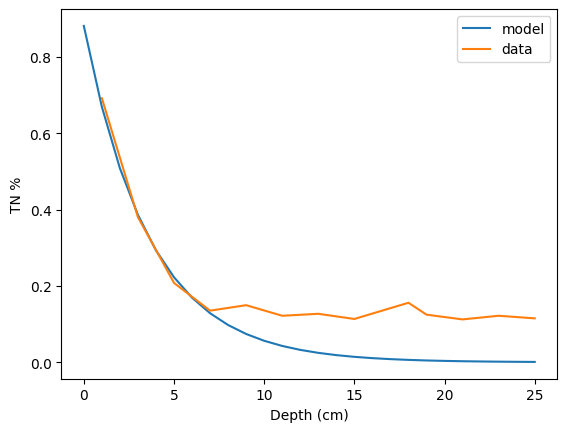

In [23]:
#solve and plot
z_total=25
dz=1
z=np.linspace(0,z_total,int(z_total/dz)+1)
TN_intercept = 0.8814539711106709
loss_coefficient = 0.7595232693452315


TN_calc , z = N_loss_exp_solve(TN_intercept,z,loss_coefficient)

plt.plot(z, TN_calc,label='model')
plt.plot(depths,TN,label='data')
plt.ylabel('TN %')
plt.xlabel('Depth (cm)')
plt.legend()

In [24]:
#incorporate linear part based on a recalcitrant (unreactive) fraction of N - use average of the remaining datapoints from the core
#recalcitrant fraction:
rec_N_frac=((np.average(TN[5:]))/TN_intercept) # defined as fraction of the TN intercept
print (f'recalcitrant N (as a fraction of the TN intercept) = {rec_N_frac}')

recalcitrant N (as a fraction of the TN intercept) = 0.1407355010196269


In [25]:
#modify loss fcn to incorporate subdomains
def N_loss_piece_solve(TN_intercept,z,loss_coefficient,rec_N_frac):
    TN_calc = N_loss_fcn(TN_intercept,z,loss_coefficient) # reactive N
    rec_N=rec_N_frac*TN_intercept # recalcitrant N
    TN_calc=np.where(TN_calc > rec_N,TN_calc,rec_N) 
    return TN_calc, z

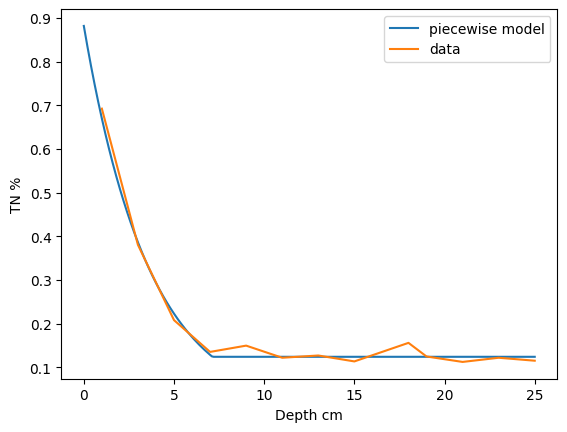

In [26]:
#solve and plot
z_total=25
dz=0.1
z=np.linspace(0,z_total,int(z_total/dz)+1)
TN_intercept = 0.8814539711106709
loss_coefficient = 0.7595232693452315
rec_N_frac=0.14073550158687148

TN_calc, z = N_loss_piece_solve(TN_intercept,z,loss_coefficient,rec_N_frac)

plt.plot(z, TN_calc,label='piecewise model')
plt.plot(depths,TN,label='data')
plt.ylabel('TN %')
plt.xlabel('Depth cm')
plt.legend()

### Method for finding the cutoff value for the exponential part of the function: 

Curve equation form:
$$ y = y_0 * a^x $$

rearrange:

$$y/y_0 = a^x$$

#isolate exponent:

$$
\begin{aligned}
log(y/y_0)=log (a^x)\\
log(y/y_0)= xlog(a)\\
log(y/y_0)/log(a)= x \\
\end{aligned}
$$
 using the parameters described above:
 
$$ log(TN/TN\_intercept)/log(loss\_coefficient)= x $$

substitute the recalcitrant N fraction for TN and will give corresponding cutoff x

### Method for integrating the exponential function to find nitrogen lost:

Curve equation form:
$$ y = y_0 * a^x $$

integrate for $a^x$: 
$$
\begin{gather}
a^x = e^{(ln(a))^x}\\
a^x = e^{xln(a)}\\
\int\ a^xdx = \int\ e^{xln(a)}\ dx\\      
\end{gather}
$$
u substitution: 
$$
\begin{gather}       
u = xln(a)\\
du/dx = ln(a)\\
dx = du/ln(a)\\
\int\ a^x\ dx = 1/ln(a)\ \cdot \int\ e^u\ du\\
\int\ a^x\ dx= 1/ln(a)\ \cdot\ e^u\\
\int\ a^x\ dx  = 1/ln(a)\ \cdot\ e^{xln(a)}\\ 
\int\ a^x\ dx =  1/ln(a)\ \cdot\ a^x + C\\
\end{gather}
$$

including the y intercept:
$$
\begin{gather}  
\int\ y_0\ \cdot\ a^x\ dx = y_0\ \cdot\ x + \frac {a^x}{ln(x)} + C \\
\end{gather}
$$

evaluated between $x = 0$ and the cutoff $x$:

$$
\begin{gather}  
\int_{0}^{cutoff\_x} \ y_0\ \cdot\ a^x\ dx  = y_0 \ \cdot\ \frac{a^{cutoff\_x}}{ln(a)} - \frac{a^0}{ln(a)} \\
\int_{0}^{cutoff\_x} \ y_0\ \cdot\ a^x\ dx  = y_0 \ \cdot\ \frac{a^{cutoff\_x} - 1} {ln(a)} \\
\end{gather}
$$

##  Section 3: running the calculation and upscaling
<hr style="border: solid 3px red">

In [27]:
#integrate over the sediment with reactive N (~top 7 cm) to find N lost

#params from previous section
TN_intercept_percent = 0.8814539711106709 # weight% N in dry sediment
loss_coefficient = 0.7595232693452315
TN_cutoff_z = np.log(rec_N_frac/TN_intercept_percent)/np.log(loss_coefficient) # upper bound of exponential function (depth at which no more N lost)

measured_exp_prod = 0.01325 #mol C/ m2 day - average taken from stations GC1&2 White et al. (2013)
measured_exp_prod_yr = measured_exp_prod * 365
Strough_area = 1e8 # area of southern trough (m2) (the hydrothermally active area)
Ntrough_area = 2e8 # area of northern trough (m2) (the hydrothermally active area)
basin_area = 14e9 # area of whole basin (m2)
basin_depth = 2000 # depth of basin (m2)
basin_vol = basin_area*basin_depth # basin volume (m3) (treated as straight-edged - overestimate)
sed_rates = [0.08, 0.25] # published sedimentation rates (cm/yr)
time_yr = TN_cutoff_z/sed_rates #time to accumulate top c. 7cm sediment (yr)
porosity = 0.8 # estimated from sediment mass and extracted water contents
density_dry = 2.5 # density of dry sediment g/cm3 (modelled as shale)

mass_sed = (1-porosity)*density_dry # g sediment in 1cm3 sediment + water

TN_intercept_g_wet = TN_intercept_percent/100*mass_sed # g nitrogen in 1cm3 sediment + water (no loss)
TN_intercept_mol_wet = TN_intercept_g_wet/14.01 # mol nitrogen in 1cm3 sediment + water (no loss)

# integrate amount of N lost in top c. 7cm sediment

int_N_sed = (TN_intercept_mol_wet*((loss_coefficient**TN_cutoff_z)-1))/(np.log(loss_coefficient)) # remaining N (mol) for top c. 7cm sed 
int_N_loss = (TN_intercept_mol_wet*TN_cutoff_z)-int_N_sed # lost N mol for top c. 7cm sed
expected_TN = TN_intercept_mol_wet*TN_cutoff_z # N mol assuming no loss 

#  calculate amount of biomass (as C) that could be sustained by hydrothermally derived N:

N_loss_mol_cm2_yr = int_N_loss  / time_yr # N loss (mol/cm2 year) (integrated over top c. 7 cm sed)
N_loss_mol_m2_yr = N_loss_mol_cm2_yr  * 10000 # N loss (mol/m2) sediment per year
N_loss_Strough = N_loss_mol_m2_yr * Strough_area # N loss (mol/yr) in hydrothermally active area (southern trough)
N_loss_2trough = N_loss_mol_m2_yr * (Strough_area + Ntrough_area)
fixed_C_mol_yr = N_loss_Strough*(106/16) # multiply by Redfield ratio to obtain Carbon (mol/yr) that could be fixed with hydrothermal N
fixed_C_mol_yr_2trough = N_loss_2trough*(106/16) # for both troughs
fixed_C_mol_m2_yr = fixed_C_mol_yr/basin_area # carbon (mol/m2 yr) that could be fixed across basin with additional N
fixed_C_mol_m2_yr_2trough = fixed_C_mol_yr_2trough/basin_area # carbon (mol/m2 yr) that could be fixed across basin with additional N

# ratio of measured productivity to additional productivity that could be sustained by additional N

ratio_measured_percent = fixed_C_mol_m2_yr / measured_exp_prod_yr * 100 # ratio calculated (HT driven) productivity to measured export productivity %
ratio_measured_percent_2trough = fixed_C_mol_m2_yr_2trough / measured_exp_prod_yr * 100 # ratio calculated (HT driven) productivity to measured export productivity %

# total biomass that could be sustained (as dry C) per year (multiply by C molar mass and 1000 to give kg)
biomass=fixed_C_mol_yr * 12.01/1000 # kg carbon / yr 
biomass_2trough=fixed_C_mol_yr_2trough * 12.01/1000 # kg carbon / yr 

print(f'Values used in section 6.5:')
print(f'remobilization efficiency = {int_N_loss/expected_TN*100} %')
print(f'calculated HT nitrogen loss from shallow seds = {N_loss_mol_m2_yr/31536000} mol N/ m^2 s')
print(f'Sediment N flux from shallow seds in S. Trough = {N_loss_Strough/31536000} mol/s')
print(f'Sediment N flux from shallow seds (both troughs) = {N_loss_2trough/31536000} mol/s')
print(f'Values used in section 6.7:')
print(f'biomass that could be sustained with remobilized N = {biomass} kg/yr')
print(f'biomass that could be sustained with remobilized N (both troughs) = {biomass_2trough} kg/yr')
print(f'productivity that could be sustained with remobilized N = {fixed_C_mol_m2_yr} mol C/ m^2 yr')
print(f'productivity that could be sustained with remobilized N (both troughs) = {fixed_C_mol_m2_yr_2trough} mol C/ m^2 yr')
print(f'average measured export productivity (White et al., 2013) = {measured_exp_prod_yr} mol C/ m^2 yr')
print(f'fraction of measured export productivity = {ratio_measured_percent} %')
print(f'fraction of measured export productivity (both troughs)= {ratio_measured_percent_2trough} %')

Values used in section 6.5:
remobilization efficiency = 54.197338400382364 %
calculated HT nitrogen loss from shallow seds = [4.32506707e-09 1.35158346e-08] mol N/ m^2 s
Sediment N flux from shallow seds in S. Trough = [0.43250671 1.35158346] mol/s
Sediment N flux from shallow seds (both troughs) = [1.29752012 4.05475038] mol/s
Values used in section 6.7:
biomass that could be sustained with remobilized N = [1085246.37498143 3391394.92181698] kg/yr
biomass that could be sustained with remobilized N (both troughs) = [ 3255739.1249443  10174184.76545095] kg/yr
productivity that could be sustained with remobilized N = [0.00645442 0.02017007] mol C/ m^2 yr
productivity that could be sustained with remobilized N (both troughs) = [0.01936326 0.0605102 ] mol C/ m^2 yr
average measured export productivity (White et al., 2013) = 4.83625 mol C/ m^2 yr
fraction of measured export productivity = [0.13345921 0.41706004] %
fraction of measured export productivity (both troughs)= [0.40037764 1.251180

In [28]:
#Comparison with Campbell and Gieskes (1984) total hydrothermal flux estimate
CG_N_M = 0.0156 # mol/L N,  measured HT endmember NH4+ conc used by Campell and Gieskes (1984) (also in Von Damm et al., 1985)
CG_N_molm3 = np.multiply(CG_N_M,1000) # mol/m3 N, HT endmember fluid N conc 
CG_flux_m3s = [10, 12] # HT flux for basin, m3/s (Campbell and Gieskes, (1984)

CG_flux_mols = np.multiply(CG_flux_m3s,CG_N_molm3) #mol/s N flux into basin

CG_fixed_C_mol_yr = CG_flux_mols*31536000*(106/16) # convert to mol/yr and multiply by Redfield ratio to obtain Carbon (mol/yr) that could be fixed with hydrothermal N
CG_fixed_C_mol_m2_yr = CG_fixed_C_mol_yr/basin_area # carbon (mol/m2 yr) that could be fixed across basin with additional N
CG_ratio_measured_percent = CG_fixed_C_mol_m2_yr / measured_exp_prod_yr * 100 # ratio calculated (HT driven) productivity to measured surface export productivity %

print(f'Values used in section 6.7:')
print(f'Campbell Gieskes total HT N flux to basin = {CG_flux_mols} mol/s')
print(f'Campbell Gieskes fraction of measured export productivity= {CG_ratio_measured_percent} %')

Values used in section 6.7:
Campbell Gieskes total HT N flux to basin = [156.  187.2] mol/s
Campbell Gieskes fraction of measured export productivity= [48.13714286 57.76457143] %
